In [1]:
import torch

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('Admission_Predict.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(400, 8)

In [5]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
!pip3 install --upgrade pandas

Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (1.0.3)


In [7]:
data = data.rename(index=str, columns={"Chance of Admit " : "admit_probability"})
data = data.reset_index()

data = data[['GRE Score', 'TOEFL Score', 'University Rating', 'LOR', 'SOP', 'CGPA', 'Research', 'admit_probability']]
data.head()

,GRE Score,TOEFL Score,University Rating,LOR,SOP,CGPA,Research,admit_probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.5,4.0,8.87,1,0.76
2,316,104,3,3.5,3.0,8.00,1,0.72
3,322,110,3,2.5,3.5,8.67,1,0.80
4,314,103,2,3.0,2.0,8.21,0,0.65


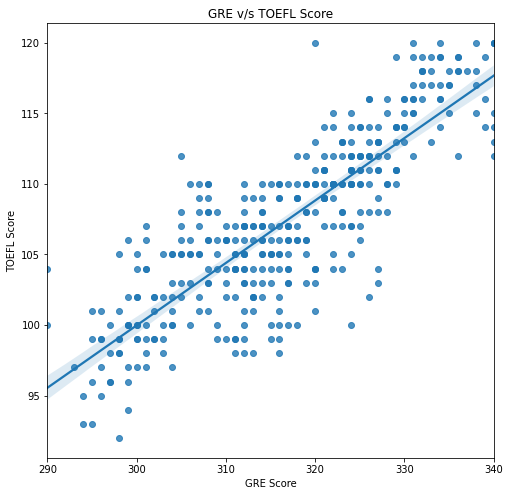

In [8]:
plt.figure(figsize = (8,8))
fig = sns.regplot(x='GRE Score', y='TOEFL Score', data=data)
plt.title("GRE v/s TOEFL Score")
plt.show(fig)

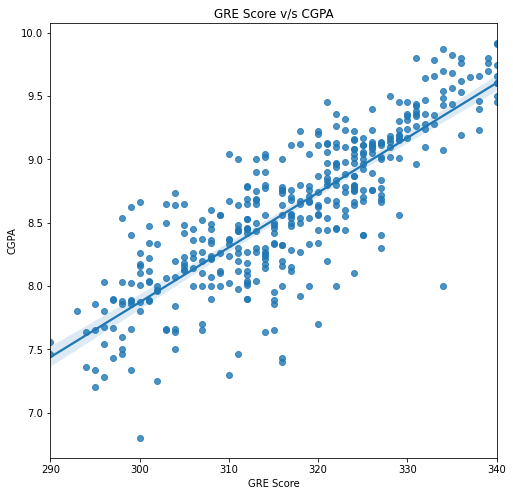

In [9]:
plt.figure(figsize = (8,8))
fig = sns.regplot(x='GRE Score', y='CGPA', data=data)
plt.title("GRE Score v/s CGPA")
plt.show(fig)

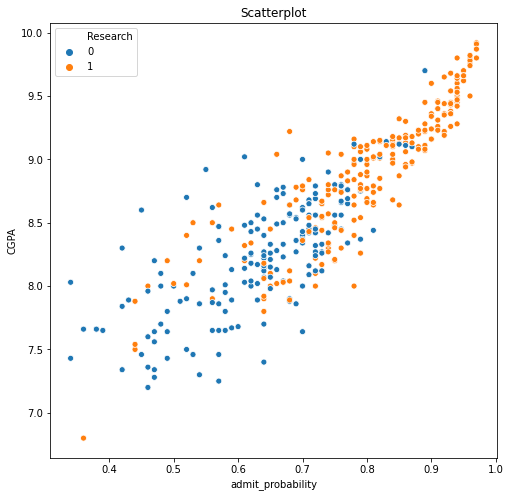

In [12]:
plt.figure(figsize = (8,8))
fig = sns.scatterplot(x='admit_probability', y='CGPA', data=data, hue='Research')
plt.title("Scatterplot")
plt.show(fig)

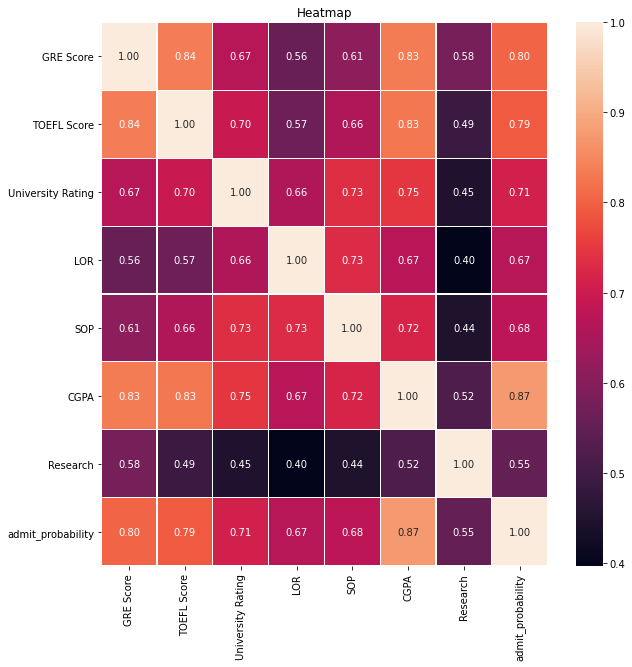

In [13]:
plt.figure(figsize = (10,10))
fig = sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt='.2f')
plt.title("Heatmap")
plt.show(fig)

#Data Preprocessing

In [0]:
from sklearn import preprocessing

In [0]:
data[['GRE Score', 'TOEFL Score', 'LOR', 'SOP', 'CGPA']] = \
            preprocessing.scale(data[['GRE Score', 'TOEFL Score', 'LOR', 'SOP', 'CGPA']])

In [16]:
data.sample(10)

,GRE Score,TOEFL Score,University Rating,LOR,SOP,CGPA,Research,admit_probability
387,-0.855855,-0.397564,2,0.052933,-1.392191,-0.837725,0,0.53
162,0.104064,0.262293,3,-0.504260,-0.397769,-0.166101,0,0.67
365,1.151249,1.087114,4,-0.504260,1.093864,0.958869,1,0.86
161,-1.641244,-1.387349,1,-0.504260,-1.889402,-1.912324,0,0.53
303,0.540391,-0.067635,3,0.052933,0.099442,-0.082148,1,0.73
58,-1.466713,-1.387349,1,-1.618648,-0.397769,-3.020504,1,0.36
146,-0.157732,-0.397564,3,-1.061454,-1.392191,-0.199682,0,0.75
91,-1.553979,-1.717277,3,0.052933,1.591075,-1.576512,0,0.38
47,1.936637,1.911935,5,0.610127,1.093864,1.848771,0,0.89
189,0.627656,0.757186,5,1.724515,1.591075,0.807754,1,0.88


In [0]:
col = ['GRE Score', 'TOEFL Score', 'LOR', 'SOP', 'CGPA', 'Research']

features = data[col]

In [18]:
features.head()

,GRE Score,TOEFL Score,LOR,SOP,CGPA,Research
0,1.762107,1.746971,1.167321,1.093864,1.764818,1
1,0.627656,-0.067635,1.167321,0.596653,0.455151,1
2,-0.070467,-0.562528,0.052933,-0.397769,-1.005631,1
3,0.453126,0.427257,-1.061454,0.099442,0.119339,1
4,-0.244998,-0.727492,-0.504260,-1.392191,-0.653029,0


In [0]:
target = data[['admit_probability']]

In [0]:
y = target.copy()

In [21]:
y.replace(to_replace = target[target >= 0.85], value = int(2), inplace=True)
y.replace(to_replace = target[target >= 0.65], value = int(1), inplace=True)
y.replace(to_replace = target[target < 0.65], value = int(0), inplace=False)

,admit_probability
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
395,1.0
396,1.0
397,2.0
398,1.0


In [0]:
target = y

In [23]:
target['admit_probability'].unique

<bound method Series.unique of 0      2.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    1.0
396    1.0
397    2.0
398    1.0
399    2.0
Name: admit_probability, Length: 400, dtype: float64>

In [0]:
from sklearn.model_selection import  train_test_split

In [0]:
X_train, x_test, Y_train, y_test = train_test_split(features, target, test_size=0.2)

In [0]:
xtrain = torch.from_numpy(X_train.values).float()
xtest = torch.from_numpy(x_test.values).float()

In [78]:
xtrain.shape

torch.Size([320, 6])

In [79]:
xtrain.dtype

torch.float32

In [0]:
ytrain = torch.from_numpy(Y_train.values).view(-1, 1)[0].long()
ytest = torch.from_numpy(y_test.values).view(-1, 1)[0].long()

#Making the model

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [74]:
input_size = xtrain.shape[0]
output_size = len(target['admit_probability'].unique())
# xtrain = xtrain.unsqueeze_(2)
input_size

320

In [0]:
class Net(nn.Module):
  def __init__(self, hidden_size, activation_fn = 'relu', apply_dropout=False):
    super(Net, self).__init__()

    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, hidden_size)
    self.fc3 = nn.Linear(hidden_size, output_size)

    self.hidden_size = hidden_size
    self.activation_fn = activation_fn
    self.dropout = None

    if apply_dropout:
      self.dropout = nn.dropout(0.2)


  def forward(self, x):
    activation_fn = None
    if self.activation_fn == 'sigmoid':
      activation_fn = F.torch.sigmoid
    
    elif self.activation_fn == 'tanh':
      activation_fn = F.torch.tanh

    elif self.activation_fn == 'relu':
      activation_fn = F.relu

    x = activation_fn(self.fc1(x))
    x = activation_fn(self.fc2(x))

    if self.dropout != None:
      x = self.dropout(x)
    
    x = self.fc3(x)
    return F.log_softmax(x, dim=-1)

In [0]:
import torch.optim as optim

In [0]:
def train_and_evaluate_model(model, learn_rate=0.001):
  epoch_data = []
  epochs = 1001

  optimizer = optim.Adam(model.parameters(), lr=learn_rate)

  loss_fn = nn.NLLLoss()

  test_accuracy = 0.0

  for epoch in range(1, epochs):
    optimizer.zero_grad()
    model.train()

    ypred = model(xtrain)

    loss = loss_fn(ypred, ytrain)
    loss.backward()

    optimizer.step()

    model.eval()

    ypred_test = model(xtest)
    loss_test = loss_fn(ypred_test, ytest)

    _, pred = ypred_test.data.max(1)

    test_accuracy = pred.eq(ytest.data).sum().item() / y_test.values.size

    epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), test_accuracy])

    if epoch % 100 == 0:
      print('epoch - %d (%d%%) train loss - %.2f test loss - %.2f test accuracy - %.4f'\
            % (epoch, epoch/150 * 10, loss.data.item(), loss_test.data.item(),
               test_accuracy))
      
  return {
      'model' : model,
      'epoch_data' : epoch_data,
      'num_epochs' : epochs,
      'optimizer' : optimizer,
      'loss_fn' : loss_fn,
      'test_accuracy' : test_accuracy,
      '_, pred' : ypred_test.data.max(1),
      'actual_test_label' : ytest,
  }

#Training the model

In [69]:
signet = Net(hidden_size=50, activation_fn = 'sigmoid')
signet

Net(
  (fc1): Linear(in_features=6, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=29, bias=True)
)

In [0]:
result_signet = train_and_evaluate_model(signet)